# Property Style Reclassification

**1. Organize Data**

Training/Validation Data = rps_property_data.csv
Test Data = rps_property_data_rlp.csv
 
**2. Train Models**

**3. Test on Validation**

**4. Test on RLP Data with labels**

**5. Test on RLP Data without labels**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

## Data Cleaning, Conversion and Partitioning

In [2]:
# Import training data
property_data = pd.read_csv('rps_property_data.csv')
property_data = property_data.replace({np.nan: None})
property_data = property_data.rename(columns = {'Unnamed: 0':'RecordID'})
property_data = property_data[(property_data['PROPERTY_STYLE'].notnull()) & \
                              (property_data['PROPERTY_STYLE']!='8_OTHER') & \
                              (property_data['PROVINCE'].notnull()) & \
                              (property_data['LATITUDE'].notnull()) & \
                              (property_data['LONGITUDE'].notnull()) 
                             ]
property_data.shape

(1601086, 16)

In [3]:
property_data.head()

,RecordID,FULL_ADDRESS,STREET_ADDRESS,SUITE,STREET_NUMBER,STREET_NAME,STREET_TYPE,STREET_DIRECTION,CITY,PROVINCE,POSTAL_CODE,LATITUDE,LONGITUDE,DISSEMINATION_AREA,PROPERTY_STYLE,TEST_FLAG
1,1,"52 AUSTIN DR, WATERLOO ON N2L 3Y3",52 AUSTIN DR,None,52,AUSTIN,DR,None,WATERLOO,ON,N2L3Y3,43.4817,-80.5322,35300062,1_SFD,0
2,2,"3 PEACHDALE AVE, ST CATHARINES ON L2M 5M2",3 PEACHDALE AVE,None,3,PEACHDALE,AVE,None,ST CATHARINES,ON,L2M5M2,43.1737,-79.2287,35260513,1_SFD,0
3,3,"1093 PRINCIPALE RTE, AUMOND, QC J0W1W0",1093 PRINCIPALE RTE,None,1093,PRINCIPALE,RTE,None,AUMOND,QC,J0W1W0,46.5425,-75.8237,24830060,1_SFD,0
4,4,"106-10 BASSETT BLVD, WHITBY ON L1N 9C5",10 BASSETT BLVD,106,10,BASSETT,BLVD,None,WHITBY,ON,L1N9C5,43.8946,-78.9441,35180602,4_ROW,0
5,5,"122 QUAIL RUN DR, DORCHESTER, ON N0L1G3",122 QUAIL RUN DR,None,122,QUAIL RUN,DR,None,DORCHESTER,ON,N0L1G3,42.978,-81.0429,35390871,1_SFD,0


In [5]:
# Convert Categorical/String to Numerical
property_data_model = property_data[['SUITE', 'STREET_NUMBER',
       'STREET_NAME', 'STREET_TYPE', 'STREET_DIRECTION', 'CITY', 'PROVINCE',
       'POSTAL_CODE', 'LATITUDE', 'LONGITUDE', 'DISSEMINATION_AREA',
       'PROPERTY_STYLE']]

property_data_model['SUITE'] = pd.factorize(property_data_model['SUITE'])[0]
property_data_model['STREET_NUMBER'] = pd.factorize(property_data_model['STREET_NUMBER'])[0]
property_data_model['STREET_NAME'] = pd.factorize(property_data_model['STREET_NAME'])[0]
property_data_model['STREET_TYPE'] = pd.factorize(property_data_model['STREET_TYPE'])[0]
property_data_model['STREET_DIRECTION'] = pd.factorize(property_data_model['STREET_DIRECTION'])[0]
property_data_model['CITY'] = pd.factorize(property_data_model['CITY'])[0]
property_data_model['PROVINCE'] = pd.factorize(property_data_model['PROVINCE'])[0]
property_data_model['POSTAL_CODE'] = pd.factorize(property_data_model['POSTAL_CODE'])[0]
property_data_model["LATITUDE"] = pd.to_numeric(property_data_model["LATITUDE"], downcast="float")
property_data_model["LONGITUDE"] = pd.to_numeric(property_data_model["LONGITUDE"], downcast="float")
property_data_model['PROPERTY_STYLE'] = property_data_model['PROPERTY_STYLE'].apply(lambda x: int(x[0]))

In [4]:
property_data['PROPERTY_STYLE'].unique()

array(['1_SFD', '4_ROW', '2_SD', '3_CONDOAPT', '5_PLEX', '6_MOBILE',
       '7_LAND'], dtype=object)

In [6]:
# Import datasets to test final model on
rlp_data = pd.read_csv('rps_property_data_rlp.csv')
rlp_data = rlp_data.replace({np.nan: None})
rlp_data = rlp_data[(rlp_data['PROVINCE'].notnull()) & \
                    (rlp_data['PROVINCE']!='CO') & \
                    (rlp_data['LATITUDE'].notnull()) & \
                    (rlp_data['LONGITUDE'].notnull())]
 
rlp_nolabel = rlp_data[(rlp_data['PROPERTY_STYLE'].isnull()) | \
                       (rlp_data['PROPERTY_STYLE'] == '8_OTHER')]
rlp_label = rlp_data[(rlp_data['PROPERTY_STYLE'].notnull()) & \
                     (rlp_data['PROPERTY_STYLE']!='8_OTHER')]

rlp_data.shape, rlp_nolabel.shape, rlp_label.shape

((1230533, 16), (534173, 16), (696360, 16))

In [7]:
# Convert Categorical/String to Numerical
rlp_nolabel_model = rlp_nolabel[['SUITE', 'STREET_NUMBER',
       'STREET_NAME', 'STREET_TYPE', 'STREET_DIRECTION', 'CITY', 'PROVINCE',
       'POSTAL_CODE', 'LATITUDE', 'LONGITUDE', 'DISSEMINATION_AREA']]

rlp_nolabel_model['SUITE'] = pd.factorize(rlp_nolabel_model['SUITE'])[0]
rlp_nolabel_model['STREET_NUMBER'] = pd.factorize(rlp_nolabel_model['STREET_NUMBER'])[0]
rlp_nolabel_model['STREET_NAME'] = pd.factorize(rlp_nolabel_model['STREET_NAME'])[0]
rlp_nolabel_model['STREET_TYPE'] = pd.factorize(rlp_nolabel_model['STREET_TYPE'])[0]
rlp_nolabel_model['STREET_DIRECTION'] = pd.factorize(rlp_nolabel_model['STREET_DIRECTION'])[0]
rlp_nolabel_model['CITY'] = pd.factorize(rlp_nolabel_model['CITY'])[0]
rlp_nolabel_model['PROVINCE'] = pd.factorize(rlp_nolabel_model['PROVINCE'])[0]
rlp_nolabel_model['POSTAL_CODE'] = pd.factorize(rlp_nolabel_model['POSTAL_CODE'])[0]
rlp_nolabel_model["LATITUDE"] = pd.to_numeric(rlp_nolabel_model["LATITUDE"], downcast="float")
rlp_nolabel_model["LONGITUDE"] = pd.to_numeric(rlp_nolabel_model["LONGITUDE"], downcast="float")

rlp_label_model = rlp_label[['SUITE', 'STREET_NUMBER',
       'STREET_NAME', 'STREET_TYPE', 'STREET_DIRECTION', 'CITY', 'PROVINCE',
       'POSTAL_CODE', 'LATITUDE', 'LONGITUDE', 'DISSEMINATION_AREA',
       'PROPERTY_STYLE']]

rlp_label_model['SUITE'] = pd.factorize(rlp_label_model['SUITE'])[0]
rlp_label_model['STREET_NUMBER'] = pd.factorize(rlp_label_model['STREET_NUMBER'])[0]
rlp_label_model['STREET_NAME'] = pd.factorize(rlp_label_model['STREET_NAME'])[0]
rlp_label_model['STREET_TYPE'] = pd.factorize(rlp_label_model['STREET_TYPE'])[0]
rlp_label_model['STREET_DIRECTION'] = pd.factorize(rlp_label_model['STREET_DIRECTION'])[0]
rlp_label_model['CITY'] = pd.factorize(rlp_label_model['CITY'])[0]
rlp_label_model['PROVINCE'] = pd.factorize(rlp_label_model['PROVINCE'])[0]
rlp_label_model['POSTAL_CODE'] = pd.factorize(rlp_label_model['POSTAL_CODE'])[0]
rlp_label_model["LATITUDE"] = pd.to_numeric(rlp_label_model["LATITUDE"], downcast="float")
rlp_label_model["LONGITUDE"] = pd.to_numeric(rlp_label_model["LONGITUDE"], downcast="float")
rlp_label_model['PROPERTY_STYLE'] = rlp_label_model['PROPERTY_STYLE'].apply(lambda x: int(x[0]))

### Data Facts

In [8]:
property_data[['PROPERTY_STYLE','FULL_ADDRESS']].groupby('PROPERTY_STYLE').count()

,FULL_ADDRESS
PROPERTY_STYLE,
1_SFD,1166357
2_SD,61259
3_CONDOAPT,217768
4_ROW,137929
5_PLEX,11770
6_MOBILE,5947
7_LAND,56


In [9]:
rlp_label[['PROPERTY_STYLE','FULL_ADDRESS']].groupby('PROPERTY_STYLE').count()

,FULL_ADDRESS
PROPERTY_STYLE,
1_SFD,511076
2_SD,27778
3_CONDOAPT,94345
4_ROW,56801
5_PLEX,3044
6_MOBILE,3307
7_LAND,9


In [10]:
# Use distribution to confirm if we should stratify the test sample by province
property_data[['PROVINCE','FULL_ADDRESS']].groupby('PROVINCE').count()

,FULL_ADDRESS
PROVINCE,
AB,168387
BC,225951
MB,27572
NB,17317
NL,9000
NS,25991
NT,29
NU,13
ON,742827


In [11]:
rlp_data[['PROVINCE','FULL_ADDRESS']].groupby('PROVINCE').count()

,FULL_ADDRESS
PROVINCE,
AB,111109
BC,214764
MB,44566
NB,23747
NL,13339
NS,24297
NT,5
ON,663521
PE,3621


In [12]:
rlp_nolabel[['PROVINCE','FULL_ADDRESS']].groupby('PROVINCE').count()

,FULL_ADDRESS
PROVINCE,
AB,47684
BC,117059
MB,23293
NB,13735
NL,6457
NS,12637
NT,4
ON,248269
PE,2030


In [15]:
# Split into training data into train and test set (test set used for model selection)
X = property_data_model.iloc[:, 0:11]
y = property_data_model.iloc[:, 11:12]

# Stratify on sample based on Province 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, \
                                                    random_state=4624, stratify=X['PROVINCE'])

In [16]:
X_train.shape, X_test.shape

((800543, 11), (800543, 11))

## Model Creation
1. KNN
2. Logistic Regression
3. Random Forest
4. Neural Network

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from datetime import datetime

### KNN
Testing Manhattan and Euclidean distance to tune k.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
start = datetime.now()
print(start)

train_accuracy_euc = []
test_accuracy_euc = []
train_accuracy_man = []
test_accuracy_man = []

# Loop through different values of k
n_neighbors = list(np.arange(1,6,1))
print(n_neighbors)

for m in ['euclidean', 'manhattan']:
    for k in n_neighbors:
        print(k,m)
        
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(X_train,y_train) 
    
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        
        if m=='euclidean':
            train_accuracy_euc.append(train_score)
            test_accuracy_euc.append(test_score)
        else:
            train_accuracy_man.append(train_score)
            test_accuracy_man.append(test_score)
            
end = datetime.now()
print (end-start)

2022-04-28 21:16:03.815036
[1, 2, 3, 4, 5]
1 euclidean
2 euclidean
3 euclidean


In [ ]:
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.set_ylim.html
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(n_neighbors, train_accuracy_euc, label='Euclidean')
ax.plot(n_neighbors, train_accuracy_man, label='Manhattan')
ax2.plot(n_neighbors, test_accuracy_euc, label='Euclidean')
ax2.plot(n_neighbors, test_accuracy_man, label='Manhattan')

ax.set_title('Training Set Accuracy')
ax2.set_title('Test Set Accuracy')
ax.set_xlabel('k value')
ax2.set_xlabel('k value')
ax.legend()
ax2.legend()

f.savefig('KNN_Results.jpg')

### Final KNN Model
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')

In [18]:
# Fitting the KNN model
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn.fit(X_train, y_train)
knn_score_train = knn.score(X_train, y_train)
knn_score_test = knn.score(X_test, y_test)

print('Training Accuracy: ' + str(knn_score_train))
print('Test Accuracy: ' + str(knn_score_test))

Training Accuracy: 0.9225987860739523
Test Accuracy: 0.8502403993289555


### Multinomial Logistic Regression
* newton-cg took 15 hours to run!!

In [16]:
# https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

start = datetime.now()
print(start)

solver = ['lbfgs', 'sag', 'saga']
lr_train_accuracy = []
lr_test_accuracy = []

for s in solver:
    print(s)

    lr_model = LogisticRegression(multi_class='multinomial', max_iter=200, solver=s)
    lr_model.fit(X_train, y_train)
    lr_score_train = lr_model.score(X_train, y_train)
    lr_score_test = lr_model.score(X_test, y_test)
    lr_train_accuracy.append(lr_score_train)
    lr_test_accuracy.append(lr_score_test)
    
end = datetime.now()
print (end-start)

2022-04-24 15:04:48.812556
lbfgs
sag
saga
0:10:47.379437


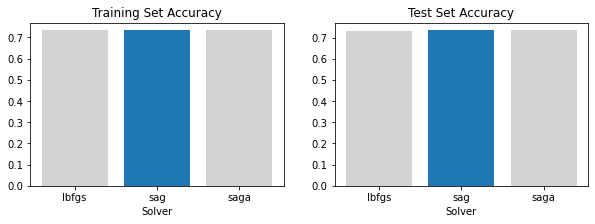

In [37]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

clrs_train = ['lightgrey' if (x < max(lr_train_accuracy)) else 'tab:blue' for x in lr_train_accuracy]
clrs_test = ['lightgrey' if (x < max(lr_test_accuracy)) else 'tab:blue' for x in lr_test_accuracy]

ax.bar(solver, lr_train_accuracy, color=clrs_train)
ax2.bar(solver, lr_test_accuracy, color=clrs_test)

ax.set_title('Training Set Accuracy')
ax2.set_title('Test Set Accuracy')
ax.set_xlabel('Solver')
ax2.set_xlabel('Solver')

f.savefig('LogReg_Results.jpg')

### Final Logistic Regression Model
LogisticRegression(multi_class='multinomial', max_iter=200, solver='sag')

In [19]:
# Fitting the LR model
lr_model = LogisticRegression(multi_class='multinomial', max_iter=200, solver='sag')
lr_model.fit(X_train, y_train)
lr_score_train = lr_model.score(X_train, y_train)
lr_score_test = lr_model.score(X_test, y_test)

print('Training Accuracy: ' + str(lr_score_train))
print('Test Accuracy: ' + str(lr_score_test))

Training Accuracy: 0.7329500101805899
Test Accuracy: 0.7333547354732975


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

start = datetime.now()
print(start)

rf_clf = RandomForestClassifier(min_samples_leaf = 100, random_state=0)
rf_clf.fit(X_train, y_train)

end = datetime.now()
print (end-start)

2022-04-28 21:35:40.224612
0:08:27.791727


In [23]:
rf_train = rf_clf.score(X_train, y_train)
rf_test = rf_clf.score(X_test, y_test)

print('Training Accuracy: ' + str(rf_train))
print('Test Accuracy: ' + str(rf_test))

Training Accuracy: 0.8530909645078403
Test Accuracy: 0.8507488042491159


**Random Forest - Feature Importance**

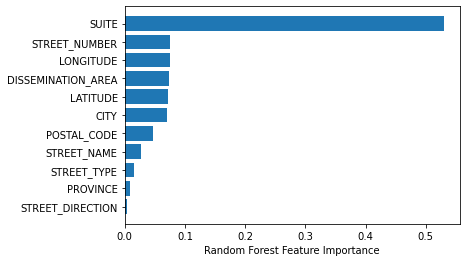

In [51]:
sorted_idx = rf_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.savefig('RandomForest_FeatureImportance.jpg')

In [ ]:
# import shap
# explainer = shap.TreeExplainer(rf_clf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")

### Neural Network

In [26]:
# https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/#mlpclassifier-for-multi-class-classification
    
param_grid = {  'hidden_layer_sizes': [(150,100,50), (100,50,30)],
                'max_iter': [200],
                'activation': ['logistic', 'relu'],
                'alpha': [0.0001, 0.05]  }

start = datetime.now()
print(start)

grid = GridSearchCV(MLPClassifier(), param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train['PROPERTY_STYLE'].ravel())

end = datetime.now()
print (end-start)

print(grid.best_params_)

2022-04-24 21:15:36.813732
4:08:42.773813
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 200}


In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier

start = datetime.now()
print(start)

nn_model = MLPClassifier(alpha=0.0001, hidden_layer_sizes =(150, 100, 50), activation='logistic')
nn_model.fit(X_train, y_train)

end = datetime.now()
print (end-start)

nn_train = nn_model.score(X_train, y_train)
nn_test = nn_model.score(X_test, y_test)

print('Training Accuracy: ' + str(nn_train))
print('Test Accuracy: ' + str(nn_test))

2022-04-28 21:44:08.152110
0:04:24.058111
Training Accuracy: 0.7282244676425876
Test Accuracy: 0.728732872562748


### Naive Bayes

In [27]:
nb_classifier = GaussianNB()

start = datetime.now()
print(start)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

end = datetime.now()
print (end-start)

print(gs_NB.best_params_)

2022-04-25 01:24:19.619733
Fitting 5 folds for each of 100 candidates, totalling 500 fits
0:07:32.545579
{'var_smoothing': 1e-09}


In [20]:
from sklearn.naive_bayes import GaussianNB

start = datetime.now()
print(start)

naive_bayes = GaussianNB(var_smoothing=1e-09)
naive_bayes.fit(X_train, y_train)

end = datetime.now()
print (end-start)

nb_score_train = naive_bayes.score(X_train, y_train)
nb_score_test = naive_bayes.score(X_test, y_test)
print('Training Accuracy: ' + str(nb_score_train))
print('Test Accuracy: ' + str(nb_score_test))

2022-04-28 21:32:55.594175
0:00:00.862308
Training Accuracy: 0.7349811315569558
Test Accuracy: 0.7351660060733777


In [47]:
len(np.logspace(0,-9, num=100))

100

# Final Model Selection

KNN (k=2, manhattan)

Logistic Regression

Random Forest

Neural Network

Naive Bayes

# Use of Model on rlp_label

In [25]:
X_rlp_label = rlp_label_model.iloc[:, 0:11]
y_rlp_label = rlp_label_model.iloc[:, 11:12]

In [26]:
# KNN Model
start = datetime.now()
print(start)

knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn.fit(X_train, y_train)
rlp_score_label = knn.score(X_rlp_label, y_rlp_label)

end = datetime.now()
print (end-start)

print('KNN RLP Label Accuracy: ' + str(rlp_score_label))

2022-04-28 21:55:35.452541
0:01:21.279238
KNN RLP Label Accuracy: 0.7260353839967832


In [27]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

start = datetime.now()
print(start)

rf_clf = RandomForestClassifier(min_samples_leaf = 100, random_state=0)
rf_clf.fit(X_train, y_train)

rlp_score_label = rf_clf.score(X_rlp_label, y_rlp_label)

end = datetime.now()
print (end-start)

print('Random Forest RLP Label Accuracy: ' + str(rlp_score_label))

Random Forest RLP Label Accuracy: 0.8388017691998392


### Get Accuracy per Property Style

In [61]:
rlp_label_model['PROPERTY_STYLE_PRED_RF'] = rf_clf.predict(X_rlp_label)
rlp_label_model['PROPERTY_STYLE_PRED_KNN'] = knn.predict(X_rlp_label)

,SUITE,STREET_NUMBER,STREET_NAME,STREET_TYPE,STREET_DIRECTION,CITY,PROVINCE,POSTAL_CODE,LATITUDE,LONGITUDE,DISSEMINATION_AREA,PROPERTY_STYLE,PROPERTY_STYLE_PRED_RF,PROPERTY_STYLE_PRED_KNN,KNN_CORRECT,RF_CORRECT
0,-1,0,0,0,-1,0,0,0,45.332199,-75.777199,35061294,2,1,1,0,0
3,-1,1,1,1,-1,1,0,1,42.758801,-81.196800,35340052,1,1,1,1,1
5,-1,2,2,0,-1,2,0,2,43.187401,-79.519402,35260829,1,1,1,1,1
7,-1,3,3,2,-1,3,1,3,52.259201,-113.796997,48080092,1,1,1,1,1
10,0,4,4,2,-1,4,2,4,48.446701,-123.502998,59170432,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230523,133,9329,2078,3,-1,484,2,2452,49.210098,-122.962997,59153655,4,3,1,0,0
1230526,-1,68,19354,4,-1,744,4,3847,49.600101,-97.030296,46020081,1,1,1,1,1
1230531,-1,26,2371,2,-1,24,4,15994,49.795700,-97.194801,46111190,1,1,1,1,1
1230532,116,2791,1845,4,-1,234,2,7227,49.259201,-122.737000,59153040,4,4,1,0,1


In [62]:
rlp_label_model['KNN_CORRECT'] = np.where(rlp_label_model['PROPERTY_STYLE_PRED_KNN']==rlp_label_model['PROPERTY_STYLE'], 1,0)
rlp_label_model['RF_CORRECT'] = np.where(rlp_label_model['PROPERTY_STYLE_PRED_RF']==rlp_label_model['PROPERTY_STYLE'], 1,0)

In [65]:
# KNN
rlp_label_model.pivot_table(index =['PROPERTY_STYLE'],
                       values =['KNN_CORRECT'],
                       aggfunc =['sum', 'count'])

,sum,count
,KNN_CORRECT,KNN_CORRECT
PROPERTY_STYLE,,
1,469245,511076
2,1494,27778
3,30557,94345
4,4239,56801
5,21,3044
6,26,3307
7,0,9


In [66]:
# RF
rlp_label_model.pivot_table(index =['PROPERTY_STYLE'],
                       values =['RF_CORRECT'],
                       aggfunc =['sum', 'count'])

,sum,count
,RF_CORRECT,RF_CORRECT
PROPERTY_STYLE,,
1,498695,511076
2,0,27778
3,75300,94345
4,10096,56801
5,17,3044
6,0,3307
7,0,9


### Accuracy By Province/Ciy

In [60]:
rlp_label['PROPERTY_STYLE_PRED_RF'] = rf_clf.predict(X_rlp_label)
rlp_label['PROPERTY_STYLE_PRED_KNN'] = knn.predict(X_rlp_label)

In [57]:
rlp_label['PROPERTY_STYLE_INT'] = rlp_label['PROPERTY_STYLE'].apply(lambda x: int(x[0]))
rlp_label['KNN_CORRECT'] = np.where(rlp_label['PROPERTY_STYLE_PRED_KNN']==rlp_label['PROPERTY_STYLE_INT'], 1,0)
rlp_label['RF_CORRECT'] = np.where(rlp_label['PROPERTY_STYLE_PRED_RF']==rlp_label['PROPERTY_STYLE_INT'], 1,0)

In [59]:
piv = rlp_label.pivot_table(index =['PROVINCE', 'CITY'],
                       values =['KNN_CORRECT'],
                       aggfunc = ['sum', 'count'])

piv.to_csv('rlp_label_accuracy_bycity.csv')

# Use model on rlp_nolabel

In [34]:
rlp_nolabel['PROPERTY_STYLE_PRED_RF'] = rf_clf.predict(rlp_nolabel_model)
rlp_nolabel['PROPERTY_STYLE_PRED_KNN'] = knn.predict(rlp_nolabel_model)

In [72]:
# KNN Counts
rlp_nolabel.pivot_table(index =['PROPERTY_STYLE_PRED_KNN'],
                       values =['FULL_ADDRESS'],
                       aggfunc =['count'])

,count
,FULL_ADDRESS
PROPERTY_STYLE_PRED_KNN,
1,453644
2,10382
3,47734
4,21572
5,332
6,505
7,4


In [73]:
# RF Counts
rlp_nolabel.pivot_table(index =['PROPERTY_STYLE_PRED_RF'],
                       values =['FULL_ADDRESS'],
                       aggfunc =['count'])

,count
,FULL_ADDRESS
PROPERTY_STYLE_PRED_RF,
1,432651
3,82491
4,18887
5,144


In [37]:
# Predicted Property Style by City
pred_count_bycity = rlp_nolabel[['CITY', 'PROPERTY_STYLE_PRED_KNN']].groupby('CITY').nunique()
pred_count_bycity.reset_index(inplace = True)
pred_count_bycity.sort_values('PROPERTY_STYLE_PRED_KNN').to_csv('propertystyle_count_bycity.csv')

In [74]:
# Toronto counts
rlp_nolabel[(rlp_nolabel['CITY']=='TORONTO')][['PROPERTY_STYLE_PRED_KNN', 'FULL_ADDRESS']].groupby('PROPERTY_STYLE_PRED_KNN').count()

,FULL_ADDRESS
PROPERTY_STYLE_PRED_KNN,
1,12047
2,1531
3,12625
4,955
7,1


#  Pull Sample of records to check

In [154]:
# Take sample of these records and see which one is correct
n_samples = [[1,44], [2,6], [3,46], [4,4], [7,1]]
check_samples = pd.DataFrame()

for i in n_samples:
    prop_style = i[0]
    n = i[1]
    
    samples = rlp_nolabel[(rlp_nolabel['PROPERTY_STYLE_PRED_KNN']==prop_style) & (rlp_nolabel['CITY']=='TORONTO')].sample(n=n)
    check_samples = pd.concat([check_samples, samples])

In [53]:
# Need 6 more records
n_samples = [[1,2], [2,1], [3,2], [4,1], [7,0]]
check_samples = pd.DataFrame()

for i in n_samples:
    prop_style = i[0]
    n = i[1]
    
    samples = rlp_nolabel[(rlp_nolabel['PROPERTY_STYLE_PRED_KNN']==prop_style) & (rlp_nolabel['CITY']=='TORONTO')].sample(n=n)
    check_samples = pd.concat([check_samples, samples])

In [155]:
check_samples.to_csv('check_samples.csv')